In [2]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>


In [3]:
import pandas as pd
import os
from IPython.display import HTML


<section id="title-slide">
<table class="kms" border="0"  width="100%"  style="width:100%;text-align:center;">
  <tr>
    <td width="99%" align="center" ><p class="fragment"><img src="./img/logo-isitcom.png" width="150" height="200" style="border-radius: 10px"></p></td>
</table>
   <h1><i><p><center>Marketing Analytics: Predicting Customer Churn in Python</center></p></i></h1>
    <h4><i><p><center>Réalisée par : Rihab Mribah</center></p></center></i></h4>
    <i><p><center>3 DNI 1</center></p></i>
    <p><center>Année universitaire 2022-2023</center></p>
</section>

<h1 ><p class="fragment fade-up"><span class="presentation_title">Plan</span></p></h1>

<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">1- Introduction</span></p></h3>

<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">2- Lire Le Dataset</span></p></h3>
<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">3- Analyse Exploratoire Des Données</span></p></h3>
<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">4- Prétraitement pour la modélisation de Churn</span></p></h3>

<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">5- Prédiction de Churn</span></p></h3>



<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">6- Tuning le modèle</span></p></h3>
<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">7- Conclusion</span></p></h3>


<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">1- Introduction</span></p></h1>
<h2 ><p class="fragment fade-up" data-fragment-index="2"><span style="color:#734d26;">Customer Churn</span></p></h2>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/churn.png" width="450" height="450" style="border-radius: 10px"></p>
</div>
<div>
<p class="fragment fade-up" data-fragment-index="4"><i style="color:#13060d;">Customer Churn c'est lorsqu'un client, un utilisateur, un abonné ou tout type de client existant cesse de faire des affaires ou met fin à la relation avec une entreprise.</i></p>
</div>

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">Les types de Customer Churn</span></p></h2>
<div>
 <p class="fragment" data-fragment-index="2" align="center" ><i style="color:#13060d;">Dans cette présentation nous traiterons 3 types de Customer churn :</i> </p>
<p class="fragment fade-up" data-fragment-index="3" ><span class="bkg_contrastR">Contractual Churn:</span><br><span class="fragment" data-fragment-index="4" style="color:#13060d;">Lorsqu'un client est sous contrat pour un service et décide d'annuler le service.</span></p> 
<p class="fragment" data-fragment-index="5" ><u style="color:#000000;">Exemple:</u> <i style="color:#13060d;"> Cable TV, SaaS </i></p><br>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="5" align="center" ><img src="./img/Tv.png" width="350" height="350" style="border-radius: 10px"></p> &nbsp;  &nbsp; &nbsp;&nbsp;<p class="fragment fade-up" data-fragment-index="5" align="center" ><img src="./img/Saas.png" width="350" height="350" style="border-radius: 10px"></p>
</div>  

</div>

<div>
<p class="fragment fade-up" data-fragment-index="1" ><span class="bkg_contrastR">Non-Contractual Churn:</span><br><span class="fragment" data-fragment-index="2" style="color:#13060d;">Lorsqu'un utilisateur annule volontairement un service.</span></p> 
<p class="fragment" data-fragment-index="3" ><u style="color:#000000;">Exemple:</u> <i style="color:#13060d;">Connexion cellulaire  (Online browsing)</i></p><br>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/exp1.png" width="350" height="350" style="border-radius: 10px"></p> &nbsp;  &nbsp; &nbsp;&nbsp;<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/exp2.png" width="350" height="350" style="border-radius: 10px"></p>
</div>  

</div>

<div>
<p class="fragment fade-up" data-fragment-index="1" ><span class="bkg_contrastR">Involuntary Churn:</span><br><span class="fragment" data-fragment-index="2" style="color:#13060d;">Lorsqu'un désabonnement se produit sans aucune demande du client.</span></p> 
<p class="fragment" data-fragment-index="3" ><u style="color:#000000;">Exemple:</u> <i style="color:#13060d;">Expiration de la carte de crédit</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/exp3.png" width="450" height="350" style="border-radius: 10px"></p>
</div>  

</div>

<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">2- Lire Le Dataset</span></p></h1>
<div>
 <p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Le Dataset utilisé dans ce projet est</i> <span class="bkg_contrastR">Telco Churn</span> <i style="color:#13060d;">qui contient ensemble des columnes (variables indépendantes) qui indiquent les caractéristiques des clients d'une société de télécommunications fictive.</i></p>
     
     
<p class="fragment fade-down" data-fragment-index="3" align="center" ><i style="color:#13060d;">La colonne</i><span class="bkg_contrastR"> Churn</span><i style="color:#13060d;">(variable de réponse) indique si le client est parti au cours du mois dernier ou non.</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/churn2.png" width="450" height="350" style="border-radius: 10px"></p>
</div>
</div>

<p class="fragment fade-right" data-fragment-index="1" align="center" ><i style="color:#13060d;">La</i><span class="bkg_contrastR">classe Non</span><i style="color:#13060d;">comprend les clients qui n'ont pas quitté l'entreprise le mois dernier.</i> </p>
<p class="fragment fade-right" data-fragment-index="2" align="center" ><i style="color:#13060d;">La</i> <span class="bkg_contrastR">classe Oui</span><i style="color:#13060d;">contient les clients qui ont décidé de mettre fin à leurs relations avec l'entreprise.</i></p>
<br>
<p class="fragment fade-right" data-fragment-index="3" align="center" ><i style="color:#13060d;">-> L’objectif est d’obtenir la relation entre les caractéristiques du client et le churn.</i></p>
    

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Importer Le Dataset Telco Churn : </span></p></h2>

<p class="fragment fade-right" data-fragment-index="3" align="center" ><i style="color:#13060d;">La première étape est de lire et de stocker les données dans un data frame Pandas à l'aide de la fonction <span class="bkg_contrastB"> pandas.read_csv</span>:</i></p>

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
  
# Import the dataset
telco = pd.read_csv('Churn.csv')
  
# Glance at the first five records
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">3- Analyse Exploratoire Des Données</span></p></h1>

<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">L'analyse exploratoire des données consiste à analyser les principales caractéristiques d'un ensemble de données, généralement des méthodes de</i> <span class="bkg_contrastR">visualisation (Seaborn)  et de statistique (pandas) </span><i style="color:#13060d;">.</i></p>
<br>

<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">L'objectif est de comprendre les données, de découvrir des modèles et des anomalies, et de vérifier les hypothèses avant d'effectuer d'autres évaluations.</i></p>
<br><br><br>


<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastB">3.1- Grouper et synthétiser les données : </span></p></h2>

<h2 ><p class="fragment fade-up" data-fragment-index="3"><span style="color:#734d26;">Churners Et non-churners: </span></p></h2>


In [5]:
print(telco['Churn'].value_counts())

no     2850
yes     483
Name: Churn, dtype: int64


<p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastR">Résultat </span></p>
<p class="fragment fade-up" data-fragment-index="2"><i style="color:#13060d;">2 Classes affichées :</i></p>
<p class="fragment" data-fragment-index="3" align="center"><span class="bkg_contrastR">yes :</span><i style="color:#13060d;"> 483 clients sont abandonnés</i></p>
<p class="fragment" data-fragment-index="4" align="center"><span class="bkg_contrastR">no :</span><i style="color:#13060d;"> 2850 clients ne résilient pas leur abonnement</i></p>


<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastB">3.2- Explorer vos données à l'aide de la visualisation : </span></p></h2>

<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Dans cette section, nous analysons les données en utilisant la visualisation à l'aide les bibliotheques </i> <span class="bkg_contrastR">Seaborn </span><i style="color:#13060d;"> et </i><span class="bkg_contrastR">matplotlib </span><i style="color:#13060d;">.</i></p>

<h3 ><p class="fragment fade-up" data-fragment-index="3"><span style="color:#734d26;">Seaborn : </span></p></h3>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">Seaborn est une bibliothèque permettant de créer des graphiques statistiques en Python, Elle est basée sur Matplotlib, et s’intègre avec les structures Pandas.
Elle apporte une simplicité et permet d’explorer et de comprendre rapidement les données.</i></p>

<h3 ><p class="fragment fade-up" data-fragment-index="5"><span style="color:#734d26;">Explorer les distributions de fonctionnalités : </span></p></h3>



In [6]:
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

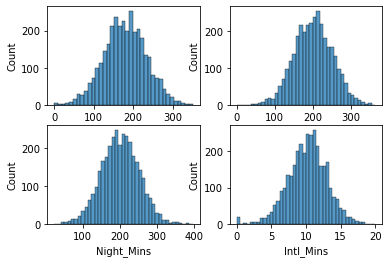

In [7]:
plt.subplot(2,2,1)
ax = sns.histplot(telco['Day_Mins'])
plt.subplot(2,2,2)
ax = sns.histplot(telco['Eve_Mins'])
plt.subplot(2,2,3)
ax = sns.histplot(telco['Night_Mins'])
plt.subplot(2,2,4)
ax = sns.histplot(telco['Intl_Mins'])
plt.show()

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Appels au service client et churn : </span></p></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Il y a une différence dans le nombre d'appels au service client laissés par les churners</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">Visualisons maintenant cette différence à l'aide </i><span class="bkg_contrastR"> box plot</span><i style="color:#13060d;"> et intégrons d'autres caractéristiques intéressantes :</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- les clients qui ont des forfaits internationaux passent-ils plus d'appels au service client ?</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- Ou ont-ils tendance à churn plus?</i></p>

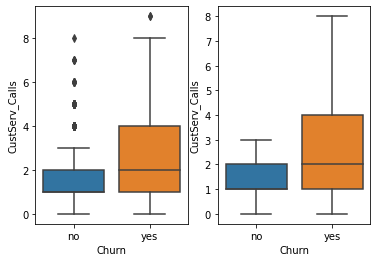

In [8]:
plt.subplot(1,2,1)
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)
plt.subplot(1,2,2)
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym="")
plt.show()

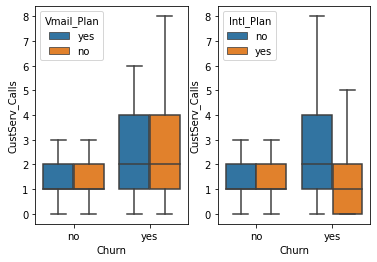

In [9]:
plt.subplot(1,2,1)
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")
plt.subplot(1,2,2)
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")
plt.show()

<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">4- Prétraitement pour la modélisation de Churn</span></p></h1>
<h2 ><p class="fragment fade-up" data-fragment-index="2"><span class="bkg_contrastB">4.1- Préparation des données </span></p></h2>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">La préparation des données est le processus de transformation des données brutes afin que les scientifiques et les analystes des données puissent les exécuter via des algorithmes d'apprentissage automatique pour découvrir des informations ou faire des prédictions.</i></p>
<h3 ><p class="fragment fade-up" data-fragment-index="4"><span style="color:#734d26;">Identification des caractéristiques(features) à convertir</span></p></h3>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">
Churn, Intl_Plan, Vmail_Plan, State</i></p>
<h3 ><p class="fragment fade-up" data-fragment-index="6"><span style="color:#734d26;">Encodage des caractéristiques binaires</span></p></h3>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">Remplacez 'no' par 0 et 'yes' par 1 dans la colonne 'Vmail_Plan' de telco et de même pour la colonne 'Churn'.</i></p>

In [10]:
#Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0 , 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0 , 'yes':1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Un encodage à chaud (One hot encoding)</span></p></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">la caractéristique 'State' peut être encodée numériquement, en utilisant la technique d'un encodage à chaud :</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/encodHot.png" width="450" height="350" style="border-radius: 10px"></p>
</div>

In [80]:
# Perform one hot encoding on 'State' *
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  WA  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   WI  WV  WY  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 51 columns]


<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Feature scaling</span></p></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Les caractéristiques doivent être à la même échelle et Rarement vrai pour les données réelles</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/encoSc.png" width="450" height="350" style="border-radius: 10px"></p></div>

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastB">4.2- Sélection et ingénierie des fonctionnalités </span></p></h2>
<h3 ><p class="fragment fade-up" data-fragment-index="2"><span style="color:#734d26;">Supprimer les features inutiles</span></p></h3>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- Identificateurs uniques</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- Les numéros de téléphone</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- Numéros de sécurité sociale</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- Numéros de compte</i></p>

In [81]:
# Drop the unnecessary features
telco = telco.drop(['Area_Code', 'Phone'], axis=1)

# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastB">4.2- Sélection et ingénierie des fonctionnalités </span></p></h2>
<h3 ><p class="fragment fade-up" data-fragment-index="2"><span style="color:#734d26;">Suppression des features corrélées</span></p></h3>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- Les caractéristiques hautement corrélées peuvent être supprimées</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- Les caractéristiques qui ne fournissent aucune information supplémentaire au mode</i></p>
<h3 ><p class="fragment fade-up" data-fragment-index="4"><span style="color:#734d26;">Feature engineering</span></p></h3>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">- Créer des nouvelles fonctionnalités pour aider à améliorer les performances du modèle</i></p>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">- Devrait consulter des experts commerciaux et spécialisés</i></p>

In [82]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [83]:
#Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0 , 'yes':1})
#concatenate with column State
#telco = pd.concat([telco,telco_state], axis=1)
telco = telco.drop(['State'], axis=1)

telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Avg_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,1.544628


<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">5- Prédiction de Churn</span></p></h1>
<h2 ><p class="fragment fade-up" data-fragment-index="2"><span class="bkg_contrastB">5.1- Faire des prédictions</span></p></h2>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">Dans ce projet: </i></p>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">- Objectif : prédire si un client va ou non désabonner</i></p>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">- Variable cible : "Churn" (target)</i></p>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">- Apprentissage automatique supervisé</i></p>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">- Apprendre des données historiques (training) pour faire de nouvelles prédictions </i></p>

<p class="fragment fade-down" data-fragment-index="1" align="center" ><span class="bkg_contrastR"> Scikit-learn</span><i style="color:#13060d;">est la bibliothèque la plus puissante et la plus robuste pour le machine learning en Python. Elle fournit une sélection d’outils efficaces pour l’apprentissage automatique et la modélisation statistique, notamment la classification, la régression et le clustering via une interface cohérente en Python.</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="1" align="center" ><img src="./img/scikitLearn.png" width="450" height="350" style="border-radius: 10px"></p>
</div>

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Modèles de Machine Learning d’Apprentissage supervisé</span></p></h3>
<h3><p class="fragment fade-up" data-fragment-index="2"><span class="bkg_contrastB"> Régression</span></p></h3>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">Dans les modèles de régression, la sortie est continue. Voici quelques types des modèles de régression les plus courants. </i></p>
<h3 ><p class="fragment fade-up" data-fragment-index="4"><span class="bkg_contrastR">1- Régression linéaire</span></p></h3>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">L’idée de la régression linéaire est simplement de trouver une ligne qui s’adapte le mieux aux données.</i></p>


In [47]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

features = telco.drop(["Churn"], axis=1).columns

# Instantiate the classifier
clf = LogisticRegression(solver='saga', max_iter=5000)

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
#print(clf.predict(new_customer))


LogisticRegression(max_iter=5000, solver='saga')

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastR">2- Random Forest (Forêt d’arbres décisionnels)</span></p></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Les forêts d’arbres décisionnels ou forêts aléatoires (Random Forest) c'est une technique d’apprentissage ensembliste qui s’appuie sur des arbres de décision.</i></p>
<h3><p class="fragment fade-up" data-fragment-index="3"><span class="bkg_contrastB"> Classification</span></p></h3>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">Dans les modèles de classification, la sortie est discrète. Voici quelques types des modèles de classification les plus courants. </i></p>
<h3 ><p class="fragment fade-up" data-fragment-index="4"><span class="bkg_contrastR">1- Support Vector Machine (SVM)</span></p></h3>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">Dans l'algorithme SVM, nous traçons chaque élément de données comme un point dans un espace à n dimensions avec la valeur de chaque caractéristique étant la valeur d'une coordonnée particulière. Ensuite, nous effectuons une classification en trouvant l'hyper-plan qui différencie très bien les deux classes.</i></p>



<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastB">5.2- Évaluer les performances du modèle</span></p></h2>
<h3 ><p class="fragment fade-up" data-fragment-index="2"><span class="bkg_contrastR">1- Training and Test Sets</span></p></h3>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">La première étape lors de la création d'un modèle consiste à diviser les données en deux groupes, généralement appelés training et testing .</i></p>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">Le <u>training </u>est utilisé par l'algorithme d'apprentissage automatique pour créer le modèle.</i></p>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">L'ensemble de <u>test </u>contient des échantillons qui ne font pas partie du processus d'apprentissage et est utilisé pour évaluer les performances du modèle.</i></p>

<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="1" align="center" ><img src="./img/training.png" width="550" height="500" style="border-radius: 10px"></p>

In [84]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastR">2- Accuracy</span></p></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Accuracy est le nombre de points de données correctement prédits sur tous les points de données.</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">Plus formellement, il est défini comme le nombre de vrais positifs et de vrais négatifs divisé par le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs: </i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/formule.png" width="550" height="500" style="border-radius: 10px"></p>&nbsp;  &nbsp; &nbsp;&nbsp;
<p class="fragment fade-up" data-fragment-index="3" align="center" ><img src="./img/acc.png" width="550" height="500" style="border-radius: 10px"></p>
</div>

In [85]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.958


<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">La accuracy est de 0.953, soit 95% (95 prédictions correctes sur le nombre total d'exemples).</i> </p>

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastR">3- Model Metrics</span></p></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Une Metric est une fonction utilisée pour évaluer les performances de votre modèle.</i></p>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Les fonctions metrics sont similaires aux fonctions de perte(loss functions), sauf que les résultats de l'évaluation d'une metric ne sont pas utilisés lors de la formation du modèle.</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="2" align="center" ><img src="./img/confusion.png" width="550" height="500" style="border-radius: 10px"></p>
</div>

In [86]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[853   7]
 [ 35 105]]


<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Precision et Recall</span></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">La precision et le recall sont deux métriques essentielles en classification, du fait de leur robustesse et de leur interprétabilité, Ces métriques sont basées sur la matrice de confusion. </i></p>

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">La precision</span></h3>
<p class="fragment" data-fragment-index="1" align="center"><i style="color:#13060d;">est également appelée Positive Predictive Value. Elle correspond au taux de prédictions correctes parmi les prédictions positives :</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="2" align="center" ><img src="./img/precision.png" width="550" height="500" style="border-radius: 10px"></p>
</div>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">Elle mesure la capacité du modèle à ne pas faire d’erreur lors d’une prédiction positive.</i></p>

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Le recall</span></h3>
<p class="fragment" data-fragment-index="1" align="center"><i style="color:#13060d;">est également appelé sensitivity (sensibilité), true positive rate ou encore hit rate (taux de détection). Il correspond au taux d’individus positifs détectés par le modèle :</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="2" align="center" ><img src="./img/recall.png" width="550" height="500" style="border-radius: 10px"></p>
</div>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">Il mesure la capacité du modèle à détecter l’ensemble des individus positifs.</i></p>

In [87]:
# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)


In [88]:

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test, y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.9302325581395349
0.7017543859649122


<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Precision vs Recall</span></h3>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="2" align="center" ><img src="./img/precVSrec.png" width="550" height="500" style="border-radius: 10px"></p>
</div>

<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">6- Tuning le modèle</span></p></h1>

<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Le réglage (tuning) est le processus de maximisation des performances d'un modèle sans surajustement ni création d'une variance trop élevée.</i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">Dans l'apprentissage automatique, cela se fait en sélectionnant les « hyperparamètres » appropriés.</i></p>
<h3 ><p class="fragment fade-up" data-fragment-index="4"><span class="bkg_contrastB">6.1- Réglage de votre modèle</span></p></h3>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">Les hyperparamètres diffèrent des autres paramètres du modèle en ce sens qu'ils ne sont pas appris automatiquement par le modèle via des méthodes d'apprentissage. Au lieu de cela, ces paramètres doivent être définis manuellement.</i></p>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">De nombreuses méthodes existent pour sélectionner les hyperparamètres appropriés:</i></p>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">- Grid search</i></p>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">- Random forest hyperparameters</i></p>



<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Tuning the number of features</span></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Les hyperparamètres par défaut utilisés par vos modèles ne sont pas optimisés pour vos données. L'objectif de la cross-validation de la grid search est d'identifier les hyperparamètres qui conduisent à des performances optimales du modèle. </i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="2" align="center" ><img src="./img/hyper1.png" width="550" height="500" style="border-radius: 10px"></p>
</div>

In [89]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

C:\Users\rihab\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rihab\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rihab\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

{'max_features': 'sqrt'}


<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Tuning other hyperparameters</span></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">La puissance de GridSearchCV entre vraiment en jeu lorsque vous réglez plusieurs hyperparamètres, car l'algorithme teste alors toutes les combinaisons possibles d'hyperparamètres pour identifier la meilleure combinaison. </i></p>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Ici, vous allez régler les hyperparamètres de forêt aléatoire suivants :</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="2" align="center" ><img src="./img/hyper2.png" width="550" height="500" style="border-radius: 10px"></p>
</div>

In [90]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the best hyperparameters
print(grid_search.best_params_) 

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Randomized search</span></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Dans scikit-learn, vous pouvez le faire avec RandomizedSearchCV. Il a la même API que GridSearchCV, sauf que vous devez spécifier une distribution de paramètres à partir de laquelle il peut échantillonner au lieu de valeurs d'hyperparamètres spécifiques. </i></p>

In [91]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)

{'max_features': 10, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}


<h3 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastB">6.2- Visualizing feature importances</span></p></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">- Scores représentant la contribution de chaque caractéristique à une prédiction</i></p>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">- Moyen efficace de communiquer les résultats aux parties prenantes</i></p>


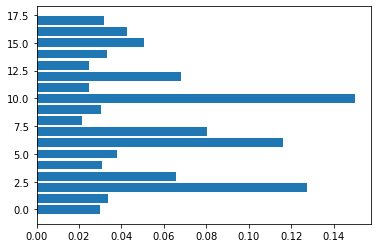

In [92]:
# Calculate feature importances
importances =clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span class="bkg_contrastB">6.3- Ajouter de nouvelles Features</span></p></h3>
<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Sources de données supplémentaires</span></p></h3>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="2" align="center" ><img src="./img/sources.png" width="550" height="500" style="border-radius: 10px"></p>
</div>


<p class="fragment" data-fragment-index="1" align="center"><i style="color:#13060d;">On va ajouter 6 nouvelles fonctionnalités ont été ajoutées au DataFrame telco :</i></p>
<p class="fragment" data-fragment-index="1" align="center"><i style="color:#13060d;">Region_Code, Cost_Call, Total_Charge, Total_Minutes, Total_Calls, Min_Call </i></p>
<h3 ><p class="fragment fade-up" data-fragment-index="2"><span style="color:#FF0000;">Les performances du modèle s'améliorent-elles ?</span></p></h3>


In [93]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test, y_test))


0.943


<p class="fragment" data-fragment-index="1" align="center"><i style="color:#13060d;">oui,amélioration du modèle</i></p>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="2" align="center" ><img src="./img/model.png" width="550" height="500" style="border-radius: 10px"></p>
</div>

<h3 ><p class="fragment fade-up" data-fragment-index="1"><span style="color:#734d26;">Avantages et Coûte</span></p></h3>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;"><span class="bkg_contrastR">Avantages</span></i></p>
<p class="fragment" data-fragment-index="3" align="center"><i style="color:#13060d;">- Meilleur retour sur investissement</i></p>
<p class="fragment" data-fragment-index="4" align="center"><i style="color:#13060d;">- Réduction des coûts </i></p>
<p class="fragment" data-fragment-index="5" align="center"><i style="color:#13060d;">- Augmentation des performances </i></p>
<p class="fragment" data-fragment-index="6" align="center"><i style="color:#13060d;"><span class="bkg_contrastR">Coûte</span></i></p>
<p class="fragment" data-fragment-index="7" align="center"><i style="color:#13060d;">- Plus grande complexité </i></p>
<p class="fragment" data-fragment-index="8" align="center"><i style="color:#13060d;">- Augmentation des ressources </i></p>
<p class="fragment" data-fragment-index="9" align="center"><i style="color:#13060d;">- Augmentation du temps d'opérationnalisation</i></p>


<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">7- Conclusion</span></p></h1>
<p class="fragment" data-fragment-index="2" align="center"><i style="color:#13060d;">Le modèle peut être étendu pour prédire quand un client va se désabonner. Il aidera également les équipes de vente/service client à réduire les taux de désabonnement en ciblant les bons clients au bon moment. </i></p>